In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:10<00:00, 156MB/s]
100% 1.06G/1.06G [00:11<00:00, 104MB/s]


In [ ]:
!unzip '/content/dogs-vs-cats.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

# Set the input image dimensions
image_width, image_height = 150, 150
input_shape = (image_width, image_height, 3)

# Create the CNN model
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Data preprocessing and augmentation
train_data_dir = '/content/dogs_vs_cats/train'
validation_data_dir = '/content/dogs_vs_cats/test'
train_data_generator = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(
    train_data_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='binary')

validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='binary')

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/10
625/625 [==============================] - 167s 264ms/step - loss: 0.6100 - accuracy: 0.6617 - val_loss: 0.5105 - val_accuracy: 0.7502
Epoch 2/10
625/625 [==============================] - 161s 258ms/step - loss: 0.4916 - accuracy: 0.7606 - val_loss: 0.4275 - val_accuracy: 0.8024
Epoch 3/10
625/625 [==============================] - 163s 260ms/step - loss: 0.4275 - accuracy: 0.7998 - val_loss: 0.4214 - val_accuracy: 0.8140
Epoch 4/10
625/625 [==============================] - 169s 271ms/step - loss: 0.3909 - accuracy: 0.8233 - val_loss: 0.3566 - val_accuracy: 0.8386
Epoch 5/10
625/625 [==============================] - 162s 259ms/step - loss: 0.3625 - accuracy: 0.8368 - val_loss: 0.3897 - val_accuracy: 0.8356
Epoch 6/10
625/625 [==============================] - 162s 260ms/step - loss: 0.3367 - accuracy: 0.8521 - val_loss: 0.3495 - val_accuracy: 0.8476
Epoch 7/10
625/625 [===================

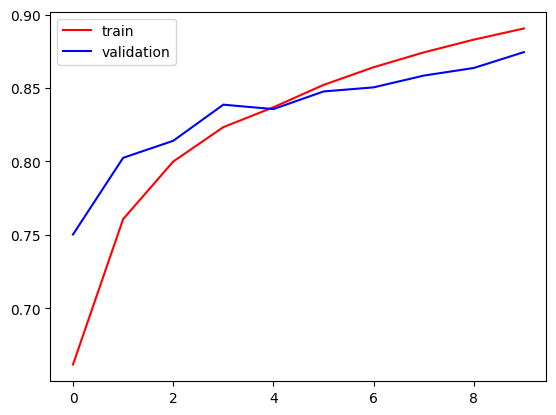

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

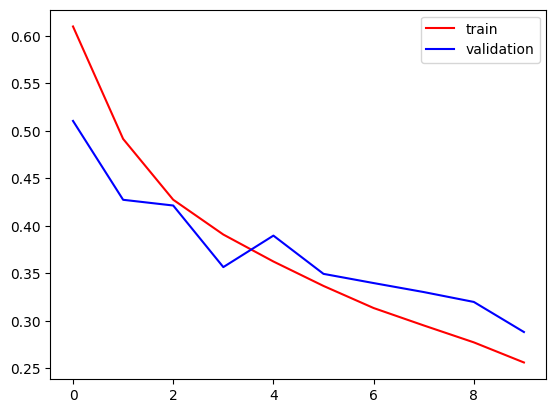

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

1/1 [==============================] - 0s 22ms/step
Predicted class: dog


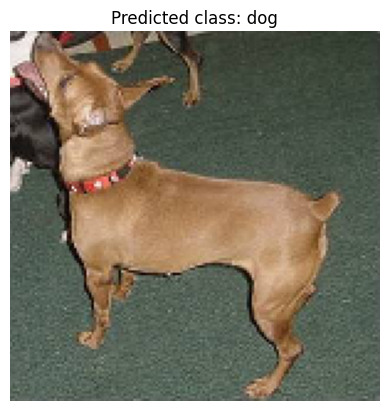

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/dogs_vs_cats/test/dogs/dog.10010.jpg'

# Load and preprocess the image
image = keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
image_array = keras.preprocessing.image.img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)
image_array = image_array / 255.0  # Normalize the image

# Make the prediction
predictions = model.predict(image_array)
predicted_class = 'dog' if predictions[0][0] > 0.5 else 'cat'
print('Predicted class:', predicted_class)

plt.imshow(image)
plt.axis('off')
plt.title('Predicted class: ' + predicted_class)
plt.show()